1. Load and Profile the Data

In [1]:
import pandas as pd
# Replace with your dataset path, e.g., 'benin-solar-data.csv'
df = pd.read_csv('../data/togo-dapaong_qc.csv')
# Display first 5 rows
print(df.head())
# Column names and data types
print(df.info())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
<class 'pandas.core.

2. Summary Statistics and Missing Value

In [2]:
# Summary statistics for numeric columns
print(df.describe())
# Missing value counts
print(df.isna().sum())
# Percentage of missing values
missing_percent = df.isna().mean() * 100
print("\nColumns with >5% missing values:")
print(missing_percent[missing_percent > 5])

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0.000000      24.2000

3. Outlier Detection and Basic Cleaning


In [3]:
#Compute Z-scores for GHI, DNI, DHI, ModA, ModB, WS, WSgust:
from scipy.stats import zscore
# Columns to check for outliers
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
# Calculate Z-scores
z_scores = df[cols].apply(zscore, nan_policy='omit')
# Flag rows where any |Z| > 3
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of rows with outliers (|Z|>3): {outliers.sum()}")
# Display outlier rows (optional)
print(df[outliers].head())

Number of rows with outliers (|Z|>3): 9251
             Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH   WS  \
4985  2021-10-28 11:06  1139.0  805.1  466.1  1172.0  1154.0  29.8  70.8  2.2   
5410  2021-10-28 18:11    -1.2    0.0    0.0     0.0     0.0  29.7  63.5  6.6   
5411  2021-10-28 18:12    -1.0    0.0    0.0     0.0     0.0  29.3  62.4  6.9   
5413  2021-10-28 18:14    -0.8    0.0    0.0     0.0     0.0  28.6  63.7  7.1   
5420  2021-10-28 18:21    -1.3    0.0    0.0     0.0     0.0  27.7  64.5  6.1   

      WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
4985     2.6      0.4  298.6     13.4  977         0            0.0   44.7   
5410     9.7      1.6  122.1     14.3  976         0            0.0   30.0   
5411     8.9      1.2  128.7     10.8  976         0            0.0   29.9   
5413     8.9      1.1  127.9     14.4  976         0            0.0   29.5   
5420     8.9      1.3  123.2     14.4  977         0            0.0   28.4   

 

In [4]:
#Handle Missing Values:
# Impute missing values with median for key columns
for col in cols:
    if df[col].isna().mean() < 0.05:  # Less than 5% missing
        df[col].fillna(df[col].median(), inplace=True)
    else:
        print(f"{col} has >5% missing, review before imputing.")
# Drop rows with missing values in critical columns (if needed)
df.dropna(subset=['GHI', 'DNI', 'DHI'], inplace=True)
# Verify no missing values in key columns
print(df[cols].isna().sum())

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


C:\Users\abdel\AppData\Local\Temp\ipykernel_24208\1144182097.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\abdel\AppData\Local\Temp\ipykernel_24208\1144182097.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [5]:
#Export Cleaned Data:
# Save cleaned DataFrame
df.to_csv('../data/togo_clean.csv', index=False)
print("Cleaned data saved to data/togo_clean.csv")

Cleaned data saved to data/togo_clean.csv


3. Time Series Analysi

In [ ]:
# Convert Timestamp:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

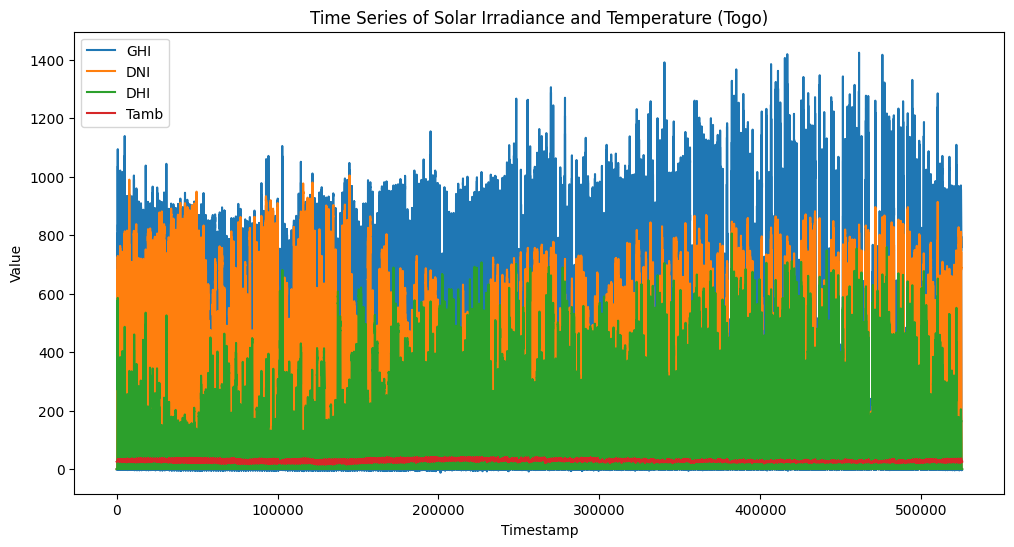

In [6]:
#Line Plot:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot GHI, DNI, DHI, Tamb
plt.figure(figsize=(12, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df.index, df[col], label=col)
plt.title('Time Series of Solar Irradiance and Temperature (Togo)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

4. Cleaning Impact

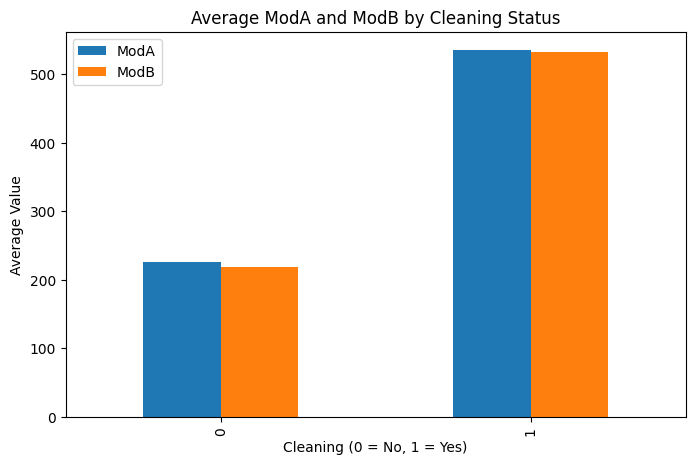

In [7]:
# Group by Cleaning flag and compute averages
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
# Plot
cleaning_impact.plot(kind='bar', figsize=(8, 5))
plt.title('Average ModA and ModB by Cleaning Status')
plt.xlabel('Cleaning (0 = No, 1 = Yes)')
plt.ylabel('Average Value')
plt.show()

5. Correlation and Relationship Analysis

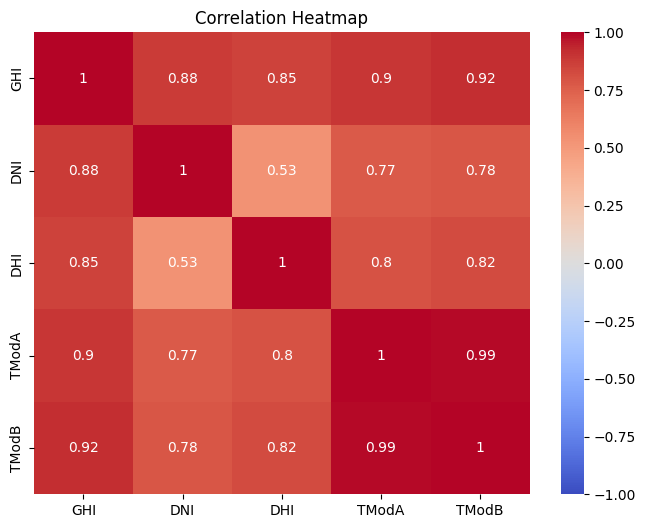

In [8]:
# Correlation Heatmap:
# Correlation matrix
corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

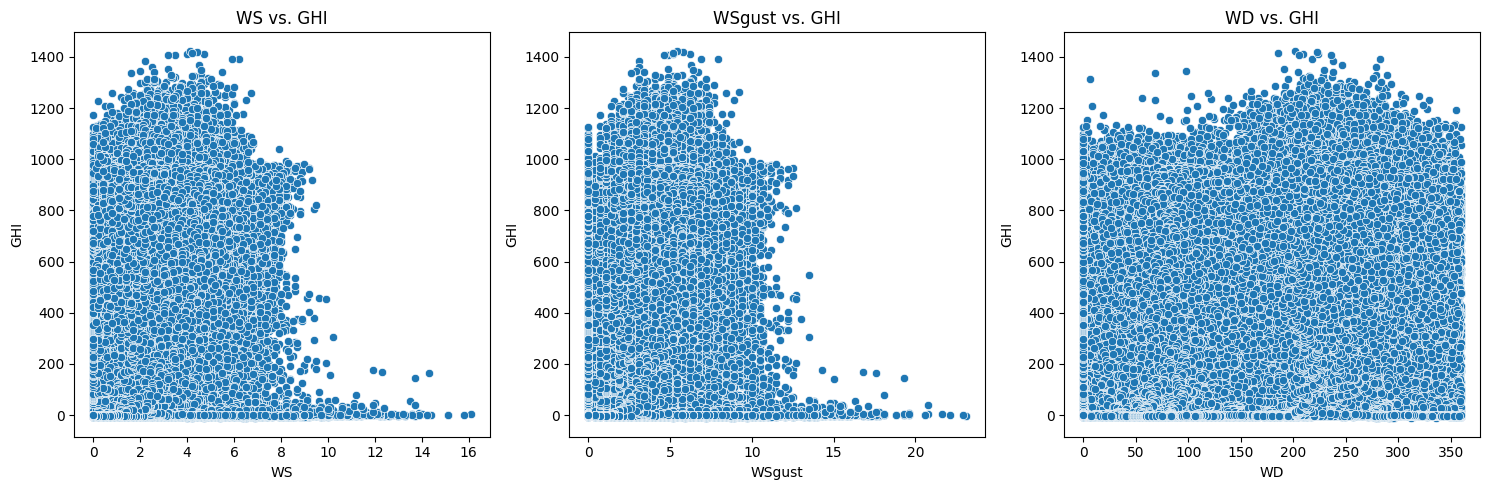

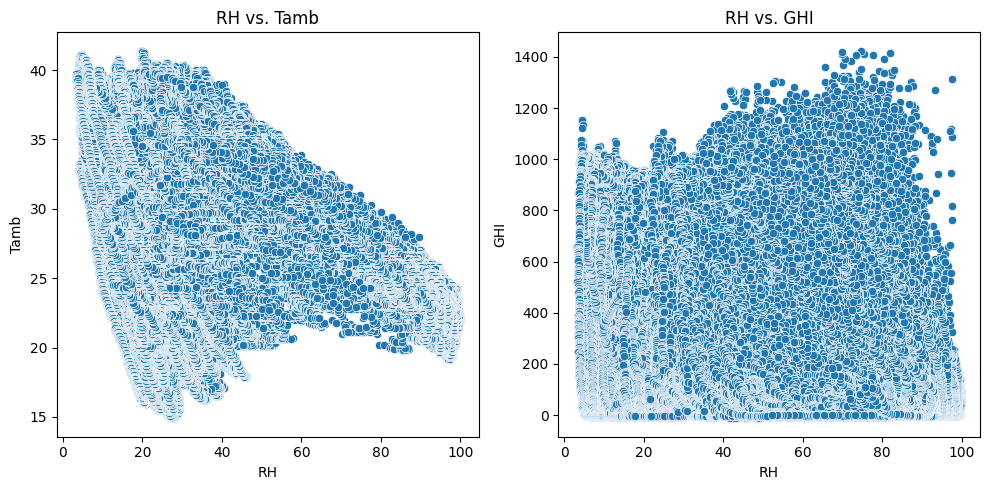

In [9]:
#Scatter Plots:
# Scatter plots: WS, WSgust, WD vs. GHI
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('WS vs. GHI')
plt.subplot(1, 3, 2)
sns.scatterplot(x='WSgust', y='GHI', data=df)
plt.title('WSgust vs. GHI')
plt.subplot(1, 3, 3)
sns.scatterplot(x='WD', y='GHI', data=df)
plt.title('WD vs. GHI')
plt.tight_layout()
plt.show()
# RH vs. Tamb and RH vs. GHI
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('RH vs. Tamb')
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('RH vs. GHI')
plt.tight_layout()
plt.show()

6.Wind and Distribution Analysis

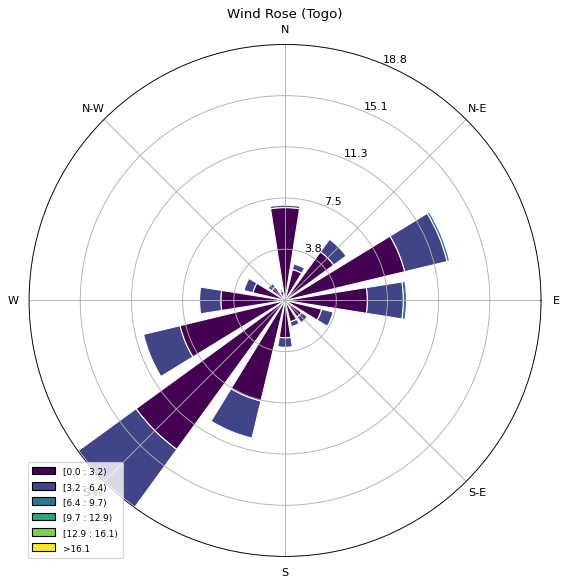

In [11]:
#Wind Rose:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose (Togo)')
plt.show()

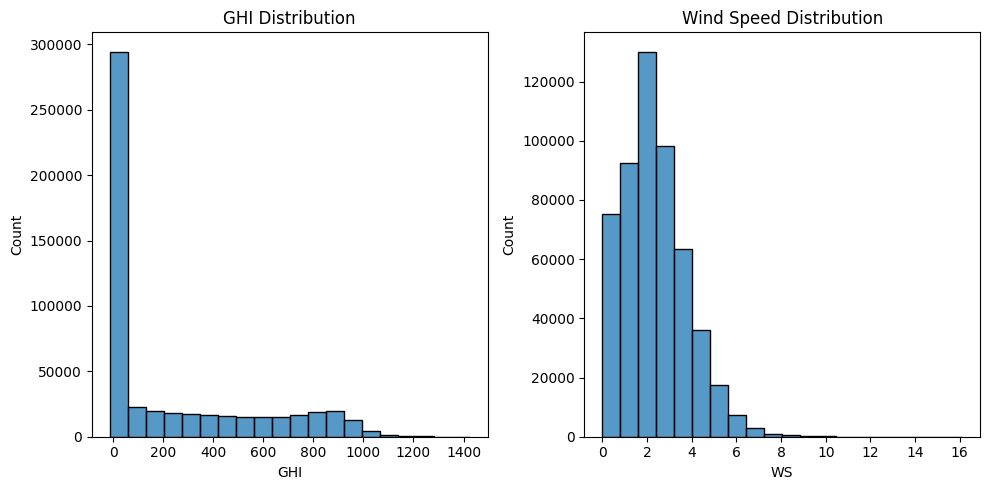

In [12]:
# Histograms:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['GHI'], bins=20)
plt.title('GHI Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['WS'], bins=20)
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

8. Bubble Chart

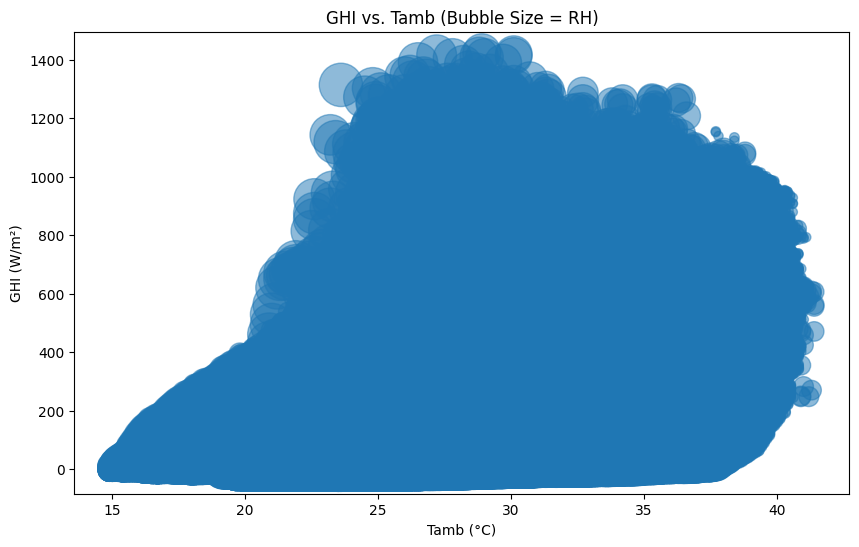

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5)
plt.title('GHI vs. Tamb (Bubble Size = RH)')
plt.xlabel('Tamb (°C)')
plt.ylabel('GHI (W/m²)')
plt.show()